In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


## Data load & transform

In [2]:
train = (pd.read_csv('./input/train.csv')).astype('float32')
print "train shape:", train.shape

train shape: (42000, 785)


In [3]:
X, Y = train.drop('label', axis=1).values, train['label'].values

print "X shape:", X.shape
print "Y shape:", Y.shape

X shape: (42000, 784)
Y shape: (42000,)


In [4]:
# Normalization
X = X / 255

In [5]:
from keras.utils.np_utils import to_categorical
Y = to_categorical(Y, 10)

print "Y shape:", Y.shape

Y shape: (42000, 10)


## NN

In [6]:
# fix random seed for reproducibility
seed = 43
np.random.seed(seed)

In [7]:
model=Sequential()
model.add(Dense(32,activation='relu',input_dim=(28 * 28)))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [8]:
model.compile(
    optimizer=RMSprop(lr=0.001),
     loss='categorical_crossentropy',
     metrics=['accuracy']
)

In [9]:
history = model.fit(
    X, 
    Y, 
    validation_split = 0.05, 
    epochs=20, 
    batch_size=64
)

Train on 39900 samples, validate on 2100 samples
Epoch 1/20
39900/39900 [==============================] - 1s - loss: 0.5157 - acc: 0.8481 - val_loss: 0.3040 - val_acc: 0.9162

In [10]:
history_dict = history.history
history_dict.keys()

['acc', 'loss', 'val_acc', 'val_loss']

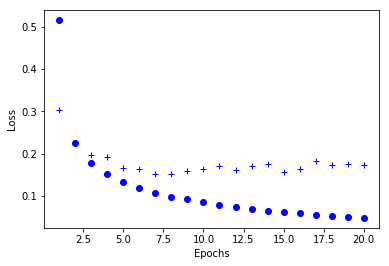

In [14]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo') # "bo" is for "blue dot"
plt.plot(epochs, val_loss_values, 'b+') # b+ is for "blue crosses"
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

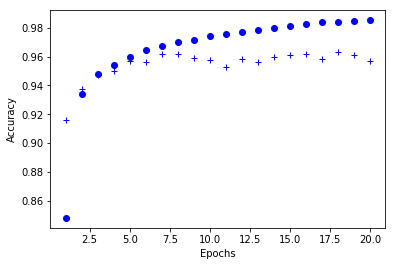

In [15]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [7]:
model = Sequential()
model.add(Dense(64, activation='relu',input_dim=(28 * 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(10, activation='softmax'))

model.compile(
    optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-09, decay=0.0),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X, 
    Y,
    validation_split = 0.1,
    epochs=15, 
    batch_size=10
)

Train on 37800 samples, validate on 4200 samples
Epoch 1/15
37800/37800 [==============================] - 9s - loss: 0.3363 - acc: 0.9026 - val_loss: 0.2096 - val_acc: 0.9462

In [8]:
history_dict = history.history
history_dict.keys()

['acc', 'loss', 'val_acc', 'val_loss']

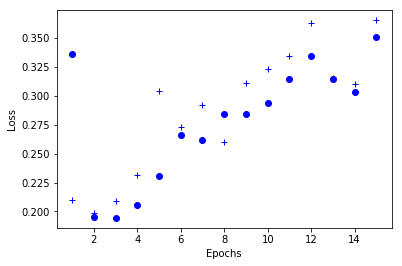

In [9]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo') # "bo" is for "blue dot"
plt.plot(epochs, val_loss_values, 'b+') # b+ is for "blue crosses"
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

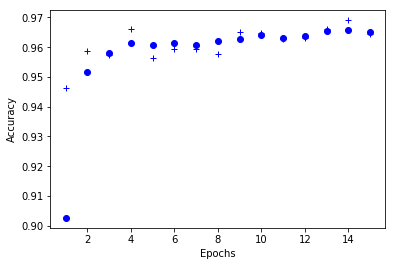

In [10]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Predict

In [12]:
X_submission = (pd.read_csv('./input/test.csv').values).astype('float32')
X_submission = X_submission / 255 # Normalization

print X_submission.shape

(28000, 784)


In [13]:
Y_predict = model.predict(X_submission)
Y_predict = np.argmax(Y_predict,axis=1)

print Y_predict[0]
print Y_predict[1]
print Y_predict[2]
print Y_predict[3]
print Y_predict[4]

2
0
9
9
3


In [14]:
submission=pd.DataFrame({"ImageId": list(range(1,len(Y_predict)+1)), "Label": Y_predict})
submission.to_csv("./submissions/submission_ccn_keras_rmspop_lr_0_001_rho_0_9_epsilon_1e-09_decay_0_0_epoch_15_normalization.csv", index=False, header=True)